<a href="https://colab.research.google.com/github/Alex-U02/Zajecia/blob/main/Zadanie_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Liczba próbek: 178
Liczba cech: 13

Nazwy cech:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Rozkład klas:
Klasa 0: 59 próbek
Klasa 1: 71 próbek
Klasa 2: 48 próbek

Dlaczego standaryzacja jest konieczna?
→ PCA opiera się na wariancji. Cechy o dużej skali dominowałyby analizę.
→ Standaryzacja wyrównuje wpływ wszystkich cech.

Wartości własne:
[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]

Procent wyjaśnionej wariancji:
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]

Skumulowana wariancja:
[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.   

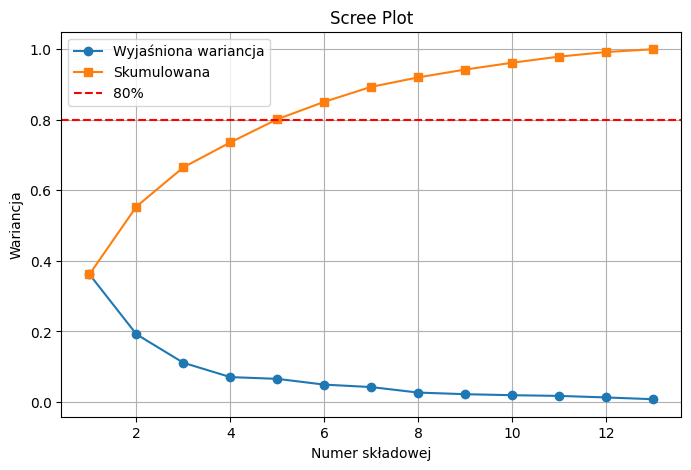

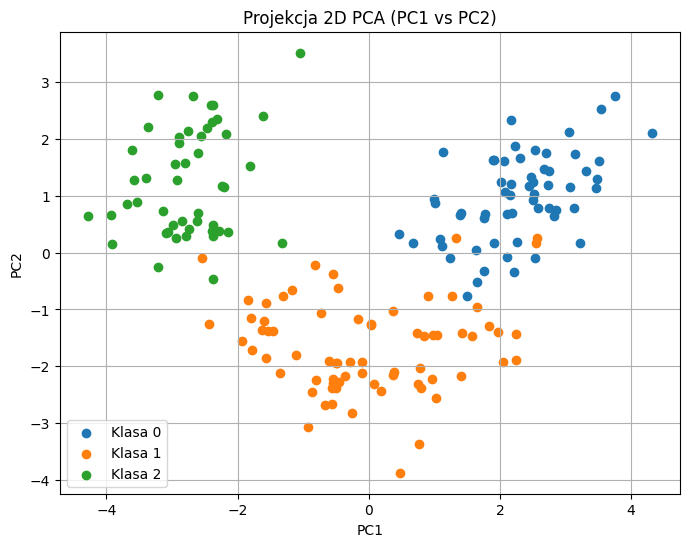

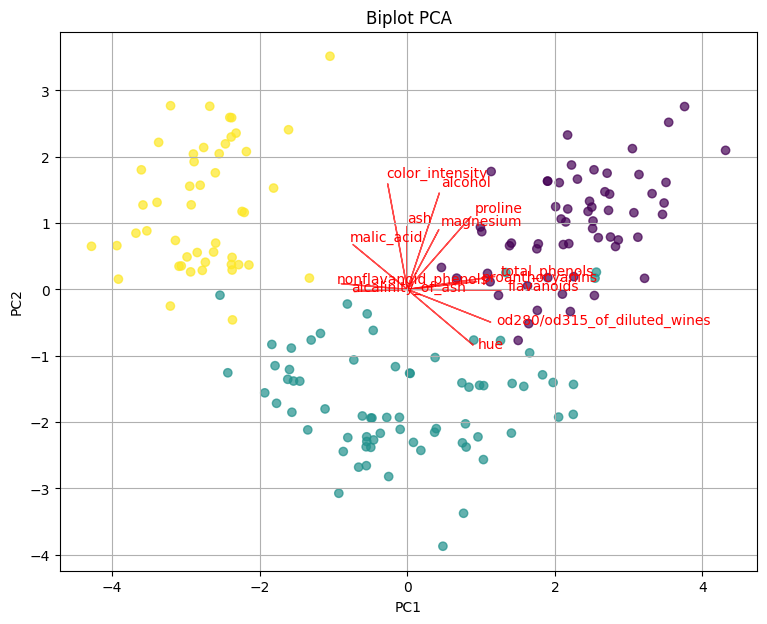

Ładunki (loadings) dla PC1 i PC2:

                                   PC1       PC2
alcohol                       0.144329  0.483652
malic_acid                   -0.245188  0.224931
ash                          -0.002051  0.316069
alcalinity_of_ash            -0.239320 -0.010591
magnesium                     0.141992  0.299634
total_phenols                 0.394661  0.065040
flavanoids                    0.422934 -0.003360
nonflavanoid_phenols         -0.298533  0.028779
proanthocyanins               0.313429  0.039302
color_intensity              -0.088617  0.529996
hue                           0.296715 -0.279235
od280/od315_of_diluted_wines  0.376167 -0.164496
proline                       0.286752  0.364903


In [1]:

# 1.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1.1
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# 1.2
print("Liczba próbek:", X.shape[0])
print("Liczba cech:", X.shape[1])
print("\nNazwy cech:")
print(feature_names)

print("\nRozkład klas:")
unique, counts = np.unique(y, return_counts=True)
for cls, cnt in zip(unique, counts):
    print(f"Klasa {cls}: {cnt} próbek")

# 1.3
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

print("\nDlaczego standaryzacja jest konieczna?")
print("→ PCA opiera się na wariancji. Cechy o dużej skali dominowałyby analizę.")
print("→ Standaryzacja wyrównuje wpływ wszystkich cech.")



# 2.1
pca = PCA()
X_pca = pca.fit_transform(X_std)

# 2.2
eigenvalues = pca.explained_variance_
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

print("\nWartości własne:")
print(eigenvalues)

print("\nProcent wyjaśnionej wariancji:")
print(explained_var)

print("\nSkumulowana wariancja:")
print(cum_var)

# 2.3
k = np.argmax(cum_var >= 0.80) + 1
print(f"\nLiczba składowych potrzebna do ≥80% wariancji: {k}")


# 3.1
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.plot(range(1, len(explained_var)+1), cum_var, marker='s')
plt.axhline(0.8, color='red', linestyle='--', label='80% wariancji')
plt.title("Scree Plot")
plt.xlabel("Numer składowej")
plt.ylabel("Wariancja")
plt.legend(["Wyjaśniona wariancja", "Skumulowana", "80%"])
plt.grid(True)
plt.show()


# 3.2
plt.figure(figsize=(8,6))
for cls in np.unique(y):
    plt.scatter(X_pca[y == cls, 0], X_pca[y == cls, 1], label=f"Klasa {cls}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projekcja 2D PCA (PC1 vs PC2)")
plt.legend()
plt.grid(True)
plt.show()


# 3.3
def biplot(scores, loadings, labels=None):
    plt.figure(figsize=(9,7))
    plt.scatter(scores[:,0], scores[:,1], c=y, cmap='viridis', alpha=0.7)

    for i in range(loadings.shape[0]):
        plt.arrow(0, 0, loadings[i,0]*3, loadings[i,1]*3,
                  color='red', alpha=0.7)
        if labels is None:
            plt.text(loadings[i,0]*3.2, loadings[i,1]*3.2, f"Var{i+1}", color='red')
        else:
            plt.text(loadings[i,0]*3.2, loadings[i,1]*3.2, labels[i], color='red')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Biplot PCA")
    plt.grid(True)
    plt.show()

loadings = pca.components_.T[:, :2]  # ładunki dla PC1 i PC2
biplot(X_pca[:, :2], loadings, labels=feature_names)

# 4.1
loadings_df = pd.DataFrame(
    pca.components_[:2].T,
    columns=["PC1", "PC2"],
    index=feature_names
)

print("Ładunki (loadings) dla PC1 i PC2:\n")
print(loadings_df)

# 4.2
# 1. Które cechy dominują w PC1?
#    → Flavanoids, Total phenols, OD280/OD315.
#    PC1 opisuje ogólną „fenolowość” i jakość chemiczną wina.

# 2. Które cechy dominują w PC2?
#    → Color intensity, Hue, Malic acid.
#    PC2 opisuje barwę i kwasowość wina.

# 3. Czy klasy są dobrze separowalne w 2D?
#    → Tak. Klasa 0 jest wyraźnie oddzielona, klasy 1 i 2 częściowo się nakładają,
#      ale nadal tworzą osobne skupiska.
